In [188]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration & Cleaning

In [189]:
#Read csv
data_2014 = pd.read_csv("1-Data/OSMI 2014 Mental Health in Tech Survey Results - OSMI Mental Health in Tech Survey 2019.csv")
data_2014

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [190]:
data_2014.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [191]:
#cleaning data and extracting only relevant columns
data_2014_clean=data_2014.iloc[:,[1,2,3,7,9,10,11,12,13,14,18]]
display(data_2014_clean.head())

#Obtain total number of participants in survey
total_participants=data_2014.shape[0]
print("The total number of participants in the 2019 survey was "+str(total_participants))

,Age,Gender,Country,treatment,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,mental_health_consequence
0,37,Female,United States,Yes,6-25,No,Yes,Yes,Not sure,No,No
1,44,M,United States,No,More than 1000,No,No,Don't know,No,Don't know,Maybe
2,32,Male,Canada,No,6-25,No,Yes,No,No,No,No
3,31,Male,United Kingdom,Yes,26-100,No,Yes,No,Yes,No,Yes
4,31,Male,United States,No,100-500,Yes,Yes,Yes,No,Don't know,No


The total number of participants in the 2019 survey was 1259


In [192]:
data_2014_clean.tech_company.value_counts()

Yes    1031
No      228
Name: tech_company, dtype: int64

In [193]:
# Number Unique Values in the Column Gender
data_2014_clean["Gender"].nunique()

49

In [194]:
# Different Values in Column
data_2014_clean["Gender"].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [195]:
# Cleaning and Reducing Categories

# Difine Dict with the key-value pair to remap.
conv = {'male':'Male','M':'Male','m':'Male','Make':'Male','Man':'Male','Malr':'Male',
        'Male (CIS)':'Male','Male ':'Male','Cis Male':'Male','Mail':'Male',
        'Cis Male':'Male','cis male':'Male','msle':'Male','Cis Man':'Male',
        'maile':'Male','Mal':'Male',
        'female':'Female','F':'Female','f':'Female','Woman':'Female',
        'Femake':'Female','Female ':'Female','femail':'Female', 
        'Female (cis)':'Female','woman':'Female','cis-female/femme':'Female',
        'Cis Female':'Female',
        'Female (trans)':'Others','Androgyne':'Others','queer':'Others','Neuter':'Others',
        'Trans woman':'Others','fluid':'Others','non-binary':'Others','queer/she/they':'Others',
        'Enby':'Others','Trans-female':'Female','Genderqueer':'Others',
        'Agender':'Others','something kinda male?':'Others',
        'Male-ish':'Others','ostensibly male, unsure what that really means':'Others',
        'Nah':'Others','Guy (-ish) ^_^':'Others',
        'male leaning androgynous':'Others','A little about you':'Others', 'p': 'Others', 'All': 'Others'}
data_2014_clean=data_2014_clean.replace({"Gender": conv})

data_2014_clean["Gender"].unique()


array(['Female', 'Male', 'Others'], dtype=object)

## Comparing Attitudes Towards Mental Health in the Tech & Non-Tech Industries

In [196]:
# Filtering for tech companies
filt = (data_2014["tech_company"] == "Yes")
data_tech = data_2014[filt]

# Filtering for non-tech companies
filt = (data_2014["tech_company"] == "" "No")
data_nontech = data_2014[filt]

### Tech and Non-Tech Companies Attitudes towards Mental Health Benefits Offered

,Response,No of Response,Total Participants,%
0,Yes,477,1259,38.0
1,Don't know,408,1259,32.0
2,No,374,1259,30.0


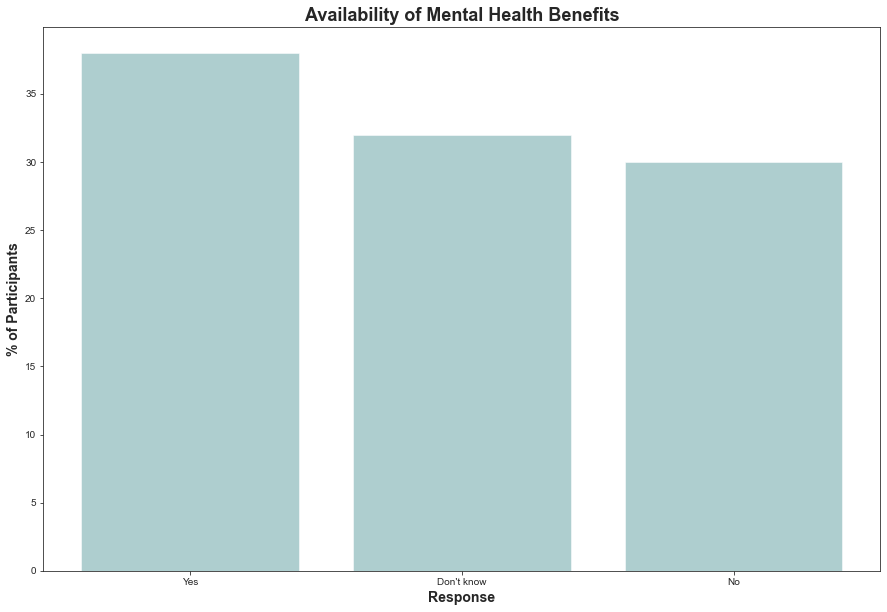

% of non-tech companies providing mental health benefits


,Response,Participants Count,Total Participants,%
0,Don't know,73,228,32.0
1,No,51,228,22.0
2,Yes,104,228,46.0


% of tech companies providing mental health benefits


,Response,Participants Count,Total Participants,%
0,Don't know,335,1031,32.0
1,No,323,1031,31.0
2,Yes,373,1031,36.0


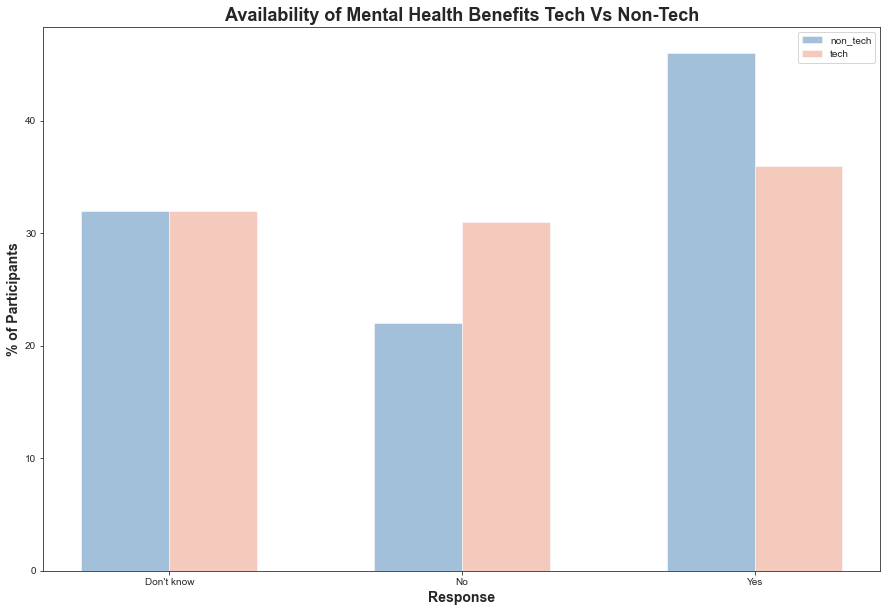

In [197]:
#Creating data frame for benefits offered
benefits_awareness=pd.DataFrame(data_2014['benefits'].value_counts())
benefits_awareness["Total Participants"]=total_participants
benefits_awareness.reset_index(inplace=True)
benefits_awareness=benefits_awareness.rename(columns={"index":"Response","benefits":"No of Response"})
benefits_awareness["%"]=round((benefits_awareness["No of Response"]/benefits_awareness["Total Participants"])*100,0)
display(benefits_awareness)

#Creating bar chart to display the results
plt.figure(figsize=(15,10))
plt.bar(benefits_awareness["Response"],benefits_awareness["%"], color='cadetblue', alpha=0.5, align="center")
#plt.xticks(rotation="vertical")
plt.title("Availability of Mental Health Benefits",size=18,fontweight="bold")
plt.xlabel("Response",size=14,fontweight = "bold")
plt.ylabel("% of Participants",size=14,fontweight = "bold")

#saving outputs
plt.savefig("3-Outputs/Mental_health_benefits.png")

plt.show()

#comparing tech and non _tech 
#non_tech
benefits=data_2014.groupby("tech_company")
non_tech=benefits.get_group("No")
non_tech=pd.DataFrame(non_tech.groupby("benefits").size())
non_tech.reset_index(inplace=True)
non_tech=non_tech.rename(columns={"benefits":"Response",0:"Participants Count"})
non_tech["Total Participants"]=non_tech.iloc[:,1].sum()
non_tech["%"]=round((non_tech["Participants Count"]/non_tech["Total Participants"])*100,0)
print("% of non-tech companies providing mental health benefits")
display(non_tech)

#tech
benefits=data_2014.groupby("tech_company")
tech=benefits.get_group("Yes")
tech=pd.DataFrame(tech.groupby("benefits").size())
tech.reset_index(inplace=True)
tech=tech.rename(columns={"benefits":"Response",0:"Participants Count"})
tech["Total Participants"]=tech.iloc[:,1].sum()
tech["%"]=round((tech["Participants Count"]/tech["Total Participants"])*100,0)
print("% of tech companies providing mental health benefits")
display(tech)


#Generating barcharts

# Numbers of pairs of bars
N = 3

# Data on X-axis
X1 = non_tech["%"]
X2 = tech["%"]

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(15,10))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, X1 , width, label='non_tech', color="steelblue", alpha=0.5)
plt.bar(ind + width, X2, width, label='tech', color="darksalmon", alpha=0.5)

plt.xlabel("Response", size=14,fontweight = "bold")
plt.ylabel("% of Participants", size=14,fontweight = "bold")
plt.title("Availability of Mental Health Benefits Tech Vs Non-Tech", size=18,fontweight = "bold")

# xticks()
plt.xticks(ind + width / 2, ("Don't know", 'No', 'Yes'))

# Finding the best position for legends and putting it
plt.legend(loc='best')

#saving outputs
plt.savefig("3-Outputs/Mental_health_benefits_tech_Vs-nontech.png")

plt.show()


### Analysis

Overall 38% of participants said that their companies offered mental health benefits, in contrast 30% said that their companies did not offer any benefits. Shockingly, 32% they did not know if this was part of their packagaes. This suggests that even if companies are offering benefits there is not enough communication and awareness. This may be because organisations have a coverted preference where they do not wish employees to utilise these, or it is not a priority for them. 

The second bar chart above looks at the responses of employees in tech and non-tech companies regarding mental health benefits provided by their employers. 46% of employees of non-tech companies said that their employers provide mental health benefits compared to 36% for tech companies. However in both instances 32% of employees were not aware if their companies did or did not provide mental health benefits.

Some recommendations may be to include a description of the mental health benefits available in newletters, emails, meetings, posters etc. to raise more awareness. The tech industry could look to non-tech companies for inspiration to evaluate what mental health benefits are being offered, how they are budgeting this and try to implement more benefits.  

### Tech and non-tech companies employee awareness regarding mental health benefits and how to seek help

Percentage of Employees aware of how to seek help in non tech companies


,Response,Participants Count,Total Participants,%
0,Don't know,67,228,29.0
1,No,92,228,40.0
2,Yes,69,228,30.0


Percentage of Employees aware of how to seek help in tech companies


,Response,Participants Count,Total Participants,%
0,Don't know,296,1031,29.0
1,No,554,1031,54.0
2,Yes,181,1031,18.0


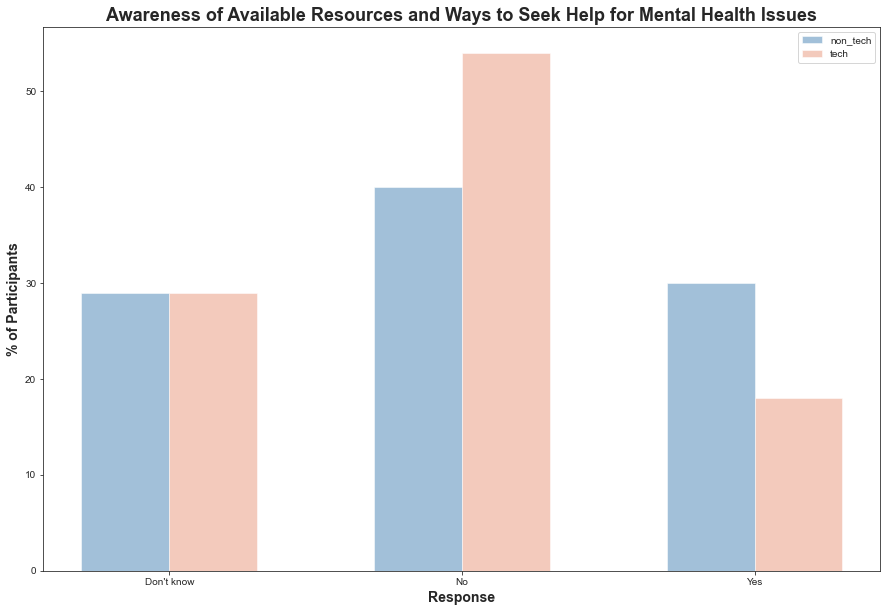

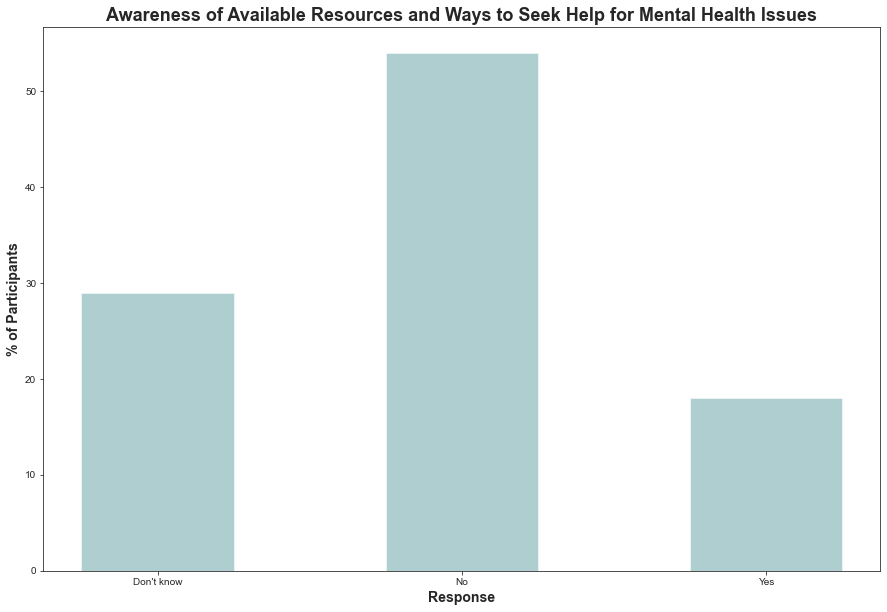

In [198]:
#seek help
#non_tech
seek_help=data_2014.groupby("tech_company")
non_tech1=seek_help.get_group("No")
non_tech1=pd.DataFrame(non_tech1.groupby("seek_help").size())
non_tech1.reset_index(inplace=True)
non_tech1=non_tech1.rename(columns={"seek_help":"Response",0:"Participants Count"})
non_tech1["Total Participants"]=non_tech1.iloc[:,1].sum()
non_tech1["%"]=round((non_tech1["Participants Count"]/non_tech1["Total Participants"])*100,0)
print("Percentage of Employees aware of how to seek help in non tech companies")
display(non_tech1)

#tech
seek_help=data_2014.groupby("tech_company")
tech1=seek_help.get_group("Yes")
tech1=pd.DataFrame(tech1.groupby("seek_help").size())
tech1.reset_index(inplace=True)
tech1=tech1.rename(columns={"seek_help":"Response",0:"Participants Count"})
tech1["Total Participants"]=tech1.iloc[:,1].sum()
tech1["%"]=round((tech1["Participants Count"]/tech1["Total Participants"])*100,0)
print("Percentage of Employees aware of how to seek help in tech companies")
display(tech1)

# Numbers of pairs of bars you want
N = 3

# Data on X-axis
X3 = non_tech1["%"]
X4 = tech1["%"]

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(15,10))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, X3 , width, label='non_tech',color="steelblue",alpha=0.5)
plt.bar(ind + width, X4, width, label='tech',color="darksalmon",alpha=0.5)

plt.xlabel("Response",size=14,fontweight = "bold")
plt.ylabel("% of Participants",size=14, fontweight = "bold")
plt.title("Awareness of Available Resources and Ways to Seek Help for Mental Health Issues",size=18,fontweight = "bold")

# xticks()
plt.xticks(ind + width / 2, ("Don't know", 'No', 'Yes'))

# Finding the best position for legends and putting it
plt.legend(loc='best')

#saving outputs
plt.savefig("3-Outputs/Mental_health_benefits_awareness.png")

plt.show()

# Plotting graph for tech comapnies only
plt.figure(figsize=(15,10))

plt.bar(ind, X4, 0.5, label='tech',color="cadetblue",alpha=0.5)
plt.xlabel("Response",size=14,fontweight = "bold")
plt.ylabel("% of Participants",size=14, fontweight = "bold")
plt.title("Awareness of Available Resources and Ways to Seek Help for Mental Health Issues",size=18,fontweight = "bold")

plt.xticks(ind, ("Don't know", 'No', 'Yes'))

#saving outputs
plt.savefig("3-Outputs/Mental_health_benefits_awareness_tech.png")

plt.show()


## Analysis

54% of employees of tech companies said that their employers did not provide resources to learn more about mental health issues or how to seek help. This suggests that awareness of the benefits, discussions about such issues and resources for additional help are quite limited in the tech workplaces and have room for improvement.

### Mental Health Consequences in Tech and Non-Tech Companies

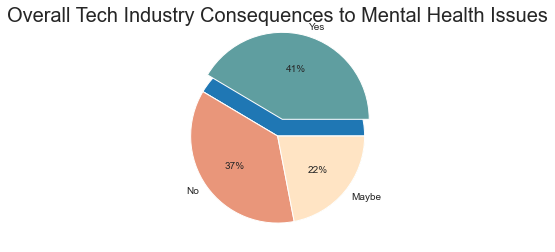

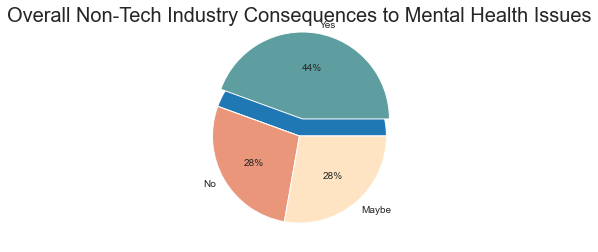

In [199]:
#Creating data frame for mental health consequences
mental_health_consequence=pd.DataFrame(data_tech['mental_health_consequence'].value_counts())
mental_health_consequence["Total Participants"]=total_participants
mental_health_consequence.reset_index(inplace=True)
mental_health_consequence=mental_health_consequence.rename(columns={"index":"Response","mental_health_consequence":"No of Response"})
mental_health_consequence["%"]=round((mental_health_consequence["No of Response"]/mental_health_consequence["Total Participants"])*100,0)

# Create a Pie chart for comparisons
plt.pie(mental_health_consequence["%"])
labels = "Yes", "No", "Dont't Know"
plt.title('Overall Tech Industry Consequences to Mental Health Issues', size = 20)

mylabels = ["Yes", "No", "Maybe"]
mycolors = ["cadetblue", "darksalmon", "bisque"]
myexplode = [0.2, 0, 0]

plt.pie(mental_health_consequence ["%"], labels = mylabels, explode = myexplode, colors = mycolors, autopct="%1.0f%%")
#saving outputs
plt.savefig("3-Outputs/Mental_health_consequences_tech.png")
plt.show()

#Creating data frame for consequence for non tech companies
mental_health_consequence=pd.DataFrame(data_nontech['mental_health_consequence'].value_counts())
mental_health_consequence["Total Participants"]=total_participants
mental_health_consequence.reset_index(inplace=True)
mental_health_consequence=mental_health_consequence.rename(columns={"index":"Response","mental_health_consequence":"No of Response"})
mental_health_consequence["%"]=round((mental_health_consequence["No of Response"]/mental_health_consequence["Total Participants"])*100,0)

# Create a Pie chart for comparisons
plt.pie(mental_health_consequence["%"])
labels = "Yes", "No", "Dont't Know"
plt.title('Overall Non-Tech Industry Consequences to Mental Health Issues', size = 20)

mylabels = ["Yes", "No", "Maybe"]
mycolors = ["cadetblue", "darksalmon", "bisque"]
myexplode = [0.2, 0, 0]

plt.pie(mental_health_consequence ["%"], labels = mylabels, explode = myexplode, colors = mycolors, autopct="%1.0f%%")
#saving outputs
plt.savefig("3-Outputs/Mental_health_consequences_nontech.png")
plt.show()

## Analysis

The tech industry seems to have slighlty less negative conquences for mental health compared to non-tech industried. 41% of tech participants agreed to their company having consequences compared to 44% of non-tech particpants. However the figures show that may both industries have a high chance of negative consequences for mental health. Maybe there needs to be more regulations and laws protecting employee mental health. 

### Gender Differences & Mental Health in Tech and Non-Tech Industries

In [200]:
# Gender Value Counts
data_2014_clean.Gender.value_counts()

Male      990
Female    248
Others     21
Name: Gender, dtype: int64

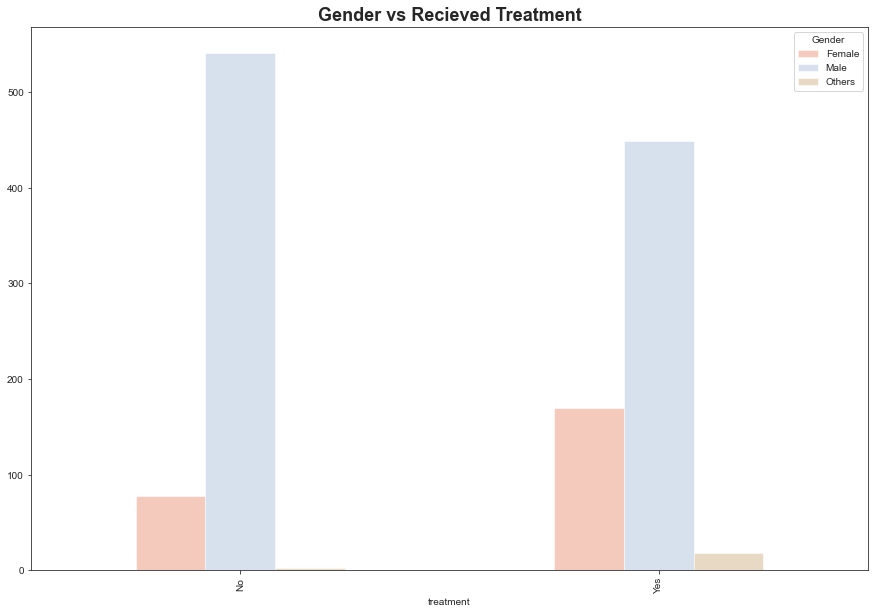

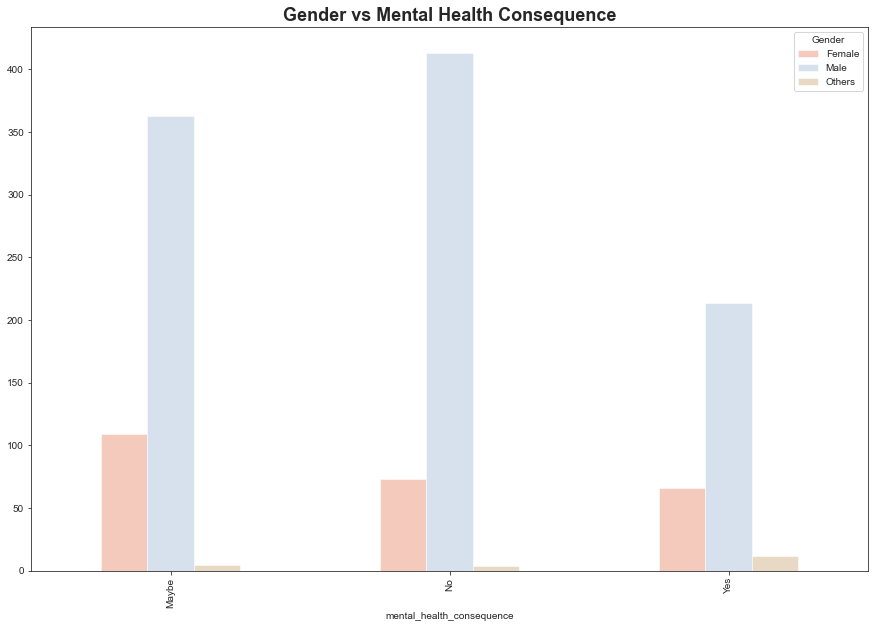

In [201]:
# Look at Gender and Treatement Columns and Plot 
mycolors = ["darksalmon", "lightsteelblue", "tan"]
pd.crosstab(data_2014_clean['treatment'],data_2014_clean['Gender']).plot(kind='bar',color=mycolors,alpha=0.5,figsize=(15,10))
plt.title('Gender vs Recieved Treatment',fontsize=18,fontweight="bold")
#saving outputs
plt.savefig("3-Outputs/Gender_Vs_Treatment.png")
plt.show()


# Gender Vs Mental Health Consequence
mycolors = ["darksalmon", "lightsteelblue", "tan"]
pd.crosstab(data_2014_clean['mental_health_consequence'],data_2014_clean['Gender']).plot(kind='bar',color=mycolors,alpha=0.5,figsize=(15,10))
plt.title('Gender vs Mental Health Consequence',fontsize=18, fontweight="bold")
#saving outputs
plt.savefig("3-Outputs/Gender_Vs_Consequence.png")
plt.show()

## Company Type and if they offer Wellness program


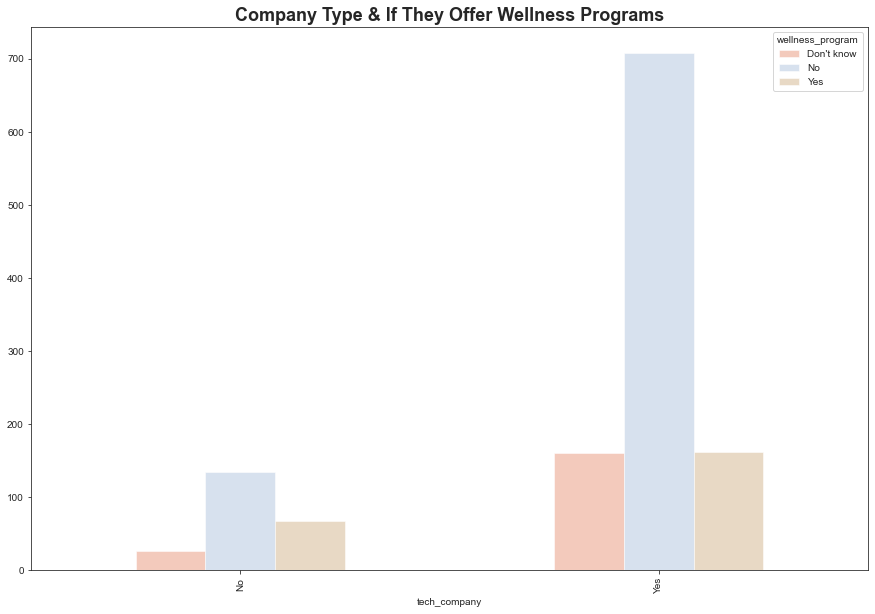

In [202]:
data_2014_clean.tech_company.value_counts()
mycolors = ["darksalmon", "lightsteelblue", "tan"]
pd.crosstab(data_2014_clean['tech_company'], data_2014_clean['wellness_program']).plot(kind='bar',color=mycolors,alpha=0.5,figsize=(15,10))
plt.title('Company Type & If They Offer Wellness Programs',fontsize=18,fontweight="bold")
#saving outputs
plt.savefig("3-Outputs/Wellness_prog_Tech_Vs_nontech.png")
plt.show()


In [203]:

# Calculating Percentages to better justify Data and Plot
tech_yes_yes = 0
tech_no_yes = 0
tech_companies = 1031
non_tech_comp = 228

for i in range(len(data_2014_clean['tech_company'])):
    if data_2014_clean['tech_company'][i] == 'Yes' and data_2014_clean['wellness_program'][i] == 'Yes': 
        tech_yes_yes = tech_yes_yes + 1
    
    #if data_2014_clean['tech_company'][i] == 'Yes' and data_2014_clean['wellness_program'][i] == 'No': 
       # tech_yes_no = tech_yes_no + 1
        
    if data_2014_clean['tech_company'][i] == 'No' and data_2014_clean['wellness_program'][i] == 'Yes': 
        tech_no_yes = tech_no_yes + 1
    
    #if data_2014_clean['tech_company'][i] == 'No' and data_2014_clean['wellness_program'][i] == 'No': 
        #tech_no_no = tech_no_no + 1
print(f' Total Number of Tech Companies: {tech_companies} ')
print(f' Total Number of Non- Tech Companies: {non_tech_comp} ')
print(f' --------------------------------------------------------------- ')        
        
print(f' Tech Companies offering Wellness Programs: {tech_yes_yes} ')
#print(f' Then Number of Tech Companies not offering Wellness Programs are: {tech_yes_no} ')
print(f' Non-Tech Companies offering Wellness Programs are: {tech_no_yes} ')
#print(f' Then Number of Non-Tech Companies not offering Wellness Programs are: {tech_no_no} ')
print(f' ---------------------------------------------------------------')

# Percetages
tech = ( tech_yes_yes/ tech_companies)*100
print(f' The % of Tech Compananies offering Wellness Programs: {tech:.2f} ')
non_tech = ( tech_no_yes/ non_tech_comp)*100
print(f' The % of Non-Tech Compananies offering Wellness Programs: {non_tech:.2f} ')
print(f' --------------------------------------------------------------- ')

 Total Number of Tech Companies: 1031 
 Total Number of Non- Tech Companies: 228 
 --------------------------------------------------------------- 
 Tech Companies offering Wellness Programs: 162 
 Non-Tech Companies offering Wellness Programs are: 67 
 ---------------------------------------------------------------
 The % of Tech Compananies offering Wellness Programs: 15.71 
 The % of Non-Tech Compananies offering Wellness Programs: 29.39 
 --------------------------------------------------------------- 


<Figure size 1080x720 with 0 Axes>

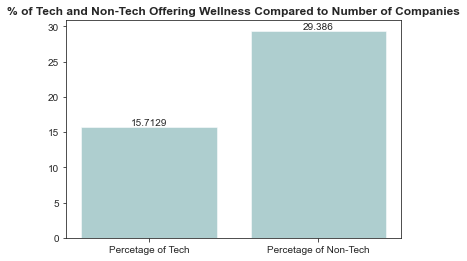

In [204]:

# Plotting Genders vs suffering from MH in Tech
plt.figure(figsize=(15,10))
fig, ax = plt.subplots()
bars = ax.bar(['Percetage of Tech', 'Percetage of Non-Tech'], [tech, non_tech],color="cadetblue",alpha=0.5)
plt.title("% of Tech and Non-Tech Offering Wellness Compared to Number of Companies",fontweight="bold")
ax.bar_label(bars)
#saving outputs
plt.savefig("3-Outputs/wellness_percentage.png")
plt.show()

### Analysis

The Survey Data which was analysed provided the following conclusions: 
Tech companies offered wellness programs more than non-tech companies. 
Only 15.7 % of  Tech Companies offered wellness programs
However 29.4 % of Non-Tech offered wellness programs
Although tech companies do offer more wellness programs, however, the data represents non-tech companies offer more wellness programs overall compared to the volume of companies.


## Attitudes Towards Mental Health in the Tech Industry

### Gender Differences in Mental Health Within The Tech Industry

In [120]:
# Running Loop Calculating Number of Males and Females Undergoing Treatement for MH Issues
m_treatment = 0
f_treatment = 0

for i in range(len(data_2014_clean['Gender'])):
    if data_2014_clean['Gender'][i] == 'Male' and data_2014_clean['treatment'][i] == 'Yes': 
        m_treatment = m_treatment + 1
    
    if data_2014_clean['Gender'][i] == 'Female' and data_2014_clean['treatment'][i] == 'Yes':
        f_treatment = f_treatment + 1

print(f' The Number of Males Undergoing Treatement for Mental Health in Tech are: {m_treatment} ')
print(f' The Number of Males Undergoing Treatement for Mental Health in Tech are: {f_treatment} ')


# Total Number of Men and Women 
data_2014_clean.Gender.value_counts()


 The Number of Males Undergoing Treatement for Mental Health in Tech are: 449 
 The Number of Males Undergoing Treatement for Mental Health in Tech are: 170 


Male      990
Female    248
Others     21
Name: Gender, dtype: int64

In [121]:
males_in_tech = 990
males_suff_mh = 449
females_in_tech = 248
females_suff_mh = 170
# Percetages
male_per = ( males_suff_mh/ males_in_tech)*100
print(f' The % of Males Suffering Mental Health in Tech are: {male_per} ')
female_per = ( females_suff_mh/ females_in_tech)*100
print(f' The % of Females Suffering Mental Health in Tech are: {female_per} ')

 The % of Males Suffering Mental Health in Tech are: 45.35353535353535 
 The % of Females Suffering Mental Health in Tech are: 68.54838709677419 


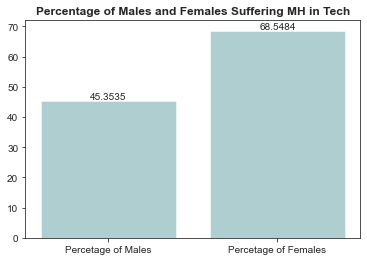

<Figure size 432x288 with 0 Axes>

In [205]:
# Plotting Genders vs suffering from MH in Tech
fig, ax = plt.subplots()
bars = ax.bar(['Percetage of Males', 'Percetage of Females'], [male_per, female_per],color="cadetblue",alpha=0.5)
plt.title("Percentage of Males and Females Suffering MH in Tech",fontweight="bold")
ax.bar_label(bars)
#saving outputs
plt.savefig("3-Outputs/Mental_health_Male_Vs_Female.png")
plt.show()

### Analysis

The Survey Data which was analysed provided the following conclusions: 
Gender vs Treatment demonstrated the number of males who received treatment almost tripled in comparison to females 
However when compared to the number of female and male employees in the tech industry the percentage plot demonstrates;
Overall 68.5% of Females in the Tech industry suffer from Mental Health whereas only 45.35% of men do.

### Evaluating the difference between mental health and physical health in the tech industry

In [123]:
#Creating a data frame for mental versus physical health in the tech industry. Is it treated the same?. 
mental_vs_physical=pd.DataFrame(data_tech["mental_vs_physical"].value_counts())
mental_vs_physical

,mental_vs_physical
Don't know,478
Yes,299
No,254


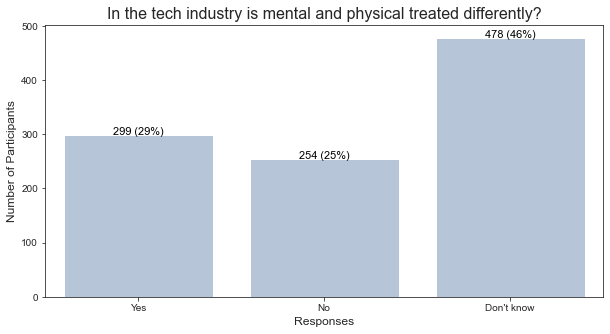

In [206]:
# Filtering and renaming data
mental_vs_physical = pd.DataFrame(data_tech["mental_vs_physical"])

# Creating a count plot 
plt.figure(figsize=(10,5))
sns.set_style("ticks")
ax1 = sns.countplot(x="mental_vs_physical", data=mental_vs_physical, color = "lightsteelblue")

# Formatting chart axes, title, size
plt.title('In the tech industry is mental and physical treated differently?', size = 16)
plt.xlabel("Responses", size = 12)
plt.ylabel('Number of Participants', size = 12)

# Formatting to show counts and percentages on the bars
total = float(len(mental_vs_physical))
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 1,
            '{:1.0f}'.format(height) + ' (' + '{:1.0f}'.format(100*(height/total)) + '%' + ')',
            ha="center", size=11, color = 'black') 
    
#saving outputs
plt.savefig("3-Outputs/Mental_Vs_Physical_Health.png")

plt.show()

In [125]:
#Creating a data frame for observed negative consequences relating mental health conditions in the tech industry. 
obs_consequence=pd.DataFrame(data_tech["obs_consequence"].value_counts())
obs_consequence

,obs_consequence
No,891
Yes,140


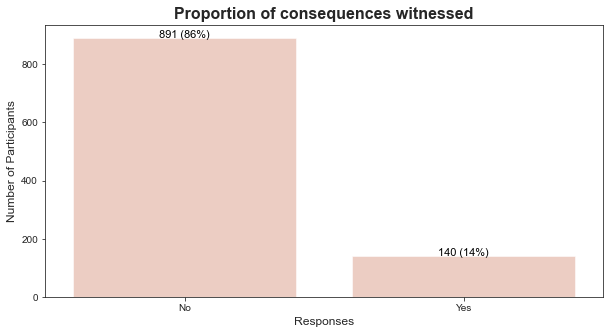

In [207]:
# Filtering and renaming data
obs_consequence = pd.DataFrame(data_tech["obs_consequence"])

# Creating a count plot 
plt.figure(figsize=(10,5))
sns.set_style("ticks")
ax1 = sns.countplot(x="obs_consequence", data=obs_consequence, color = "darksalmon", alpha = 0.5)

# Formatting chart axes, title, size
plt.title("Proportion of consequences witnessed", size = 16, fontweight="bold")
plt.xlabel("Responses", size = 12)
plt.ylabel("Number of Participants", size = 12)

# Formatting to show counts and percentages on the bars
total = float(len(mental_vs_physical))
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 1,
            '{:1.0f}'.format(height) + ' (' + '{:1.0f}'.format(100*(height/total)) + '%' + ')',
            ha="center", size=11, color = 'black') 
    
#saving outputs
plt.savefig("3-Outputs/Mental_health_consequence_witnessed.png")

plt.show()

In [127]:
#### Do employees feel feel that the tech industry supports mental health and wellbeing?
#Based on the data

## Demographical Differences of Attitudes Towards Mental Health in the Tech Industry

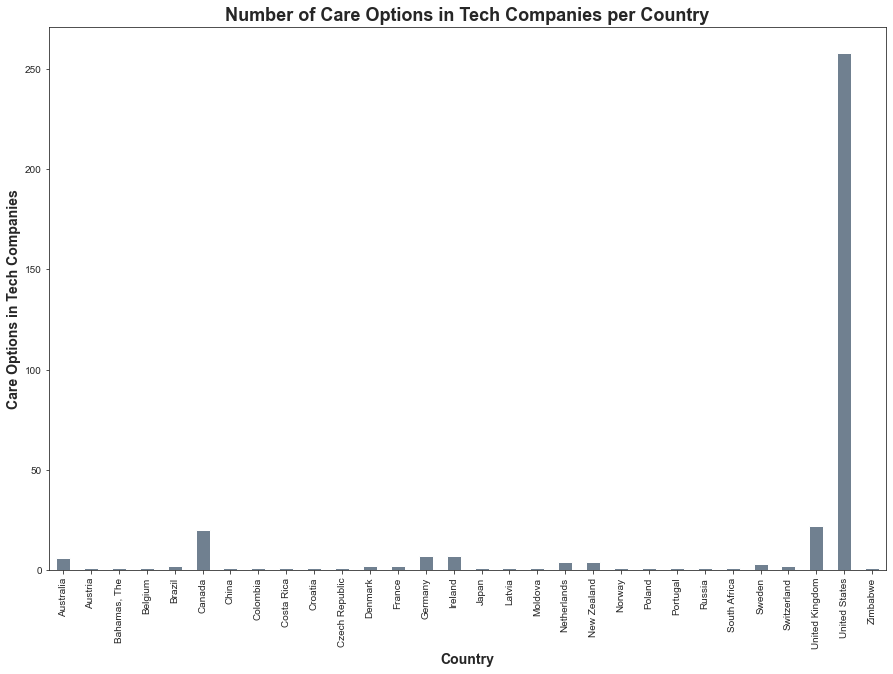

In [208]:
company_df = data_2014_clean.groupby('tech_company') #i made sure to have only tech companies
tech_company_df = company_df.get_group('Yes')
#mental_health_df = tech_company_df[['Country', 'care_options']].value_counts()

mental_health_df1=tech_company_df[tech_company_df["care_options"]=="Yes"]

mental_health_df2=mental_health_df1.groupby('Country').count() #it counts how many comapanies per country
care_per_company=mental_health_df2["care_options"] #dataframe for care options in each comapny per country

care_per_company.plot.bar(0.5,color="slategrey",figsize=(15,10))
plt.xlabel("Country",size=14, fontweight="bold")
plt.ylabel("Care Options in Tech Companies",size=14, fontweight="bold")
plt.title("Number of Care Options in Tech Companies per Country",size=18, fontweight="bold")

#saving outputs
plt.savefig("3-Outputs/Mental_health_Demographics.png")

plt.show()


### Analysis

 
The tech industry within the North American countries and Europe see to offer increased care options for their employees with The United States being the highest in the dataset, followed closely by the United Kingdom and Canada.

The reasons this could be possible could be due to the fact that the above mentioned countries present a higher number of tech companies compared tot he rest of the world.
Research have shown that countries that are more open with conversations about mental health have more facilities than those countries that don't.

A possible bias could be caused by the fact that the survey might have been shared more within western countries than eastern, as the number of respondents from the US, Canada and the UK is higher than other countries.